Import module and sub modules 

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import autograd  as ad
#import variable object
import autograd.variable as av 

Example 1: `f(x) = sin(x) + cos(x)` for x = 0

In [3]:
#Set the x variable
x = av.Variable(0)

In [4]:
#perform first operation

#pass the value through the sin block
b1 = ad.sin(x)

In [5]:
#perform the second operation
b2 = ad.cos(x)

In [6]:
#perform the final operation 
b3 = b1 + b2

In [7]:
#return data 
print(b3.data)

[1.]


In [8]:
#return gradient 
print(b3.gradient)

[[1.]]


Create a function to compute the derivative across a range of values

In [9]:
def function(x):
    x1 = av.Variable(x)
    b1 = ad.sin(x1)
    b2 = ad.cos(x1)
    b3 = b1 + b2
    return(b3.data,b3.gradient)

In [10]:
value = list()
data = list()
gradient = list()
for i in np.linspace(-2 * np.pi, 2 * np.pi):
    value.append(i)
    output = function(i)
    data.append(output[0])
    gradient.append(output[1][0])

Let's plot the values

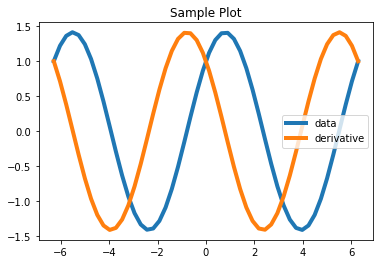

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('lines', linewidth=4, color='g')
plt.plot(value,data,label='data')
plt.plot(value,gradient,label='derivative')
plt.title("Sample Plot")
plt.legend()
plt.show()

Example 2: Create a function to evaluate at multiple values
`f(x) = sin(x + 3)*cos(x/2) + e^-x`

In [12]:
def function(x):
    x1=av.Variable(x)
    #elementary operations such as + - / * 
    #can be performed within other blocks
    b1 = ad.sin(x1 + 3)
    b2 = x1 / 2
    b3 = ad.cos(b2)
    b4 = b1/b3
    b5 = ad.exp(-x1) 
    b7 = b4 + b5
    return(b7.data,b7.gradient)

In [13]:
value = list()
data = list()
gradient = list()
for i in np.linspace(-2 * np.pi, 2 * np.pi):
    value.append(i)
    output = function(i)
    data.append(output[0][0])
    gradient.append(output[1][0])

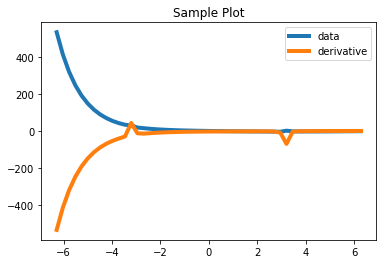

In [14]:
plt.plot(value,data,label='data')
plt.plot(value,gradient,label='derivative')
plt.title("Sample Plot")
plt.legend()
plt.show()

Example 3, using the vector framework with symetric role of x and y : 

`f(x,y)=cos(0.5*(x+y)) * exp(-0.1*(x**2 + y**2))+0.1*(x+y) + exp(0.1*(3-(x+y))`


In [15]:
def vector_function(x,y):
    x1=av.Variable([x,y])
    
    
    b1 = ad.exp(-0.1*ad.sum_elts(pow(x1,2)))
    b2 = ad.cos(0.5*ad.sum_elts(x1))
    b3 = b1*b2+0.1*ad.sum_elts(x1)+ad.exp(0.1*(3-(ad.sum_elts(x1))))
    
    return(b3.data,b3.gradient)



In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        

   

In [24]:
x,y=0.1,-0.1

data, gradient = vector_function(x,y)

In [26]:
gradient

array([[-0.05494592, -0.01502584]])

In [17]:

def plot_nice_surface_and_gradients(f, lim_inf, lim_sup, iterations=50, startingPoint=(0.1,-0.1)):
    x=np.linspace(lim_inf,lim_sup,100)
    y=np.linspace(lim_inf,lim_sup,100)

    X,Y=np.meshgrid(x,y)
        
    def data_function(a,b):
        data, grad= f(a,b)
        return(data)
    
    vf=np.vectorize(data_function)

    Z=vf(X,Y)

    fig = plt.figure(figsize=(12,10))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                          cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('vector function plus gradient descent algorithm')
    plt.legend()

    fig.colorbar(surf, shrink=0.5, aspect=5)


    x=startingPoint[0]
    y=startingPoint[1]

    lr=0.5

    for i in range(iterations):
        data, gradient = f(x,y)
        gradient=gradient[0]

        x_n=x-lr*gradient[0]
        y_n=y-lr*gradient[1]

        data_n, gradient_n=f(x_n, y_n)

        a = Arrow3D([x,x_n], [y,y_n], 
                [data[0],data_n[0]], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r")
        ax.add_artist(a)

        x=x_n
        y=y_n
    ax.add_artist(a)
    plt.draw()
    plt.show()

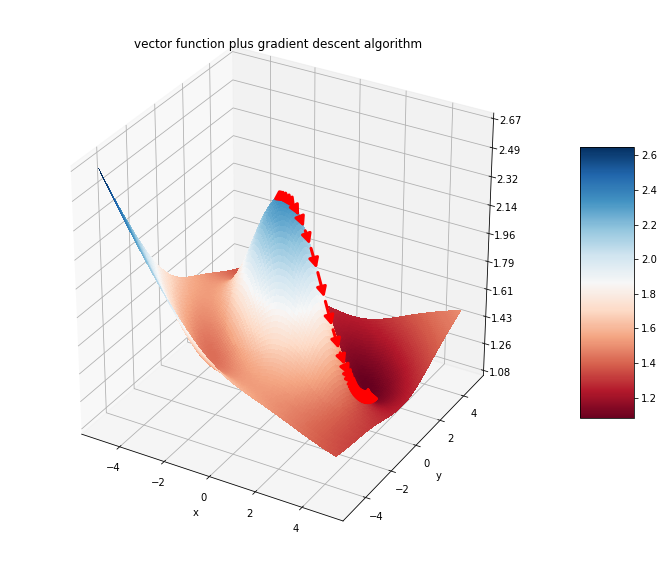

In [18]:
plot_nice_surface_and_gradients(vector_function, -5,5)

Example 3, using the vector framework with non-symetric role of x and y : 

`f(x,y)=cos(x)*sin(y)`


In [19]:
def non_symetric(a,b):
    x1=av.Variable([a,b])
    x=x1[0]
    y=x1[1]
    
    output=ad.cos(x)*ad.sin(y)
    
    return(output.data, output.gradient)

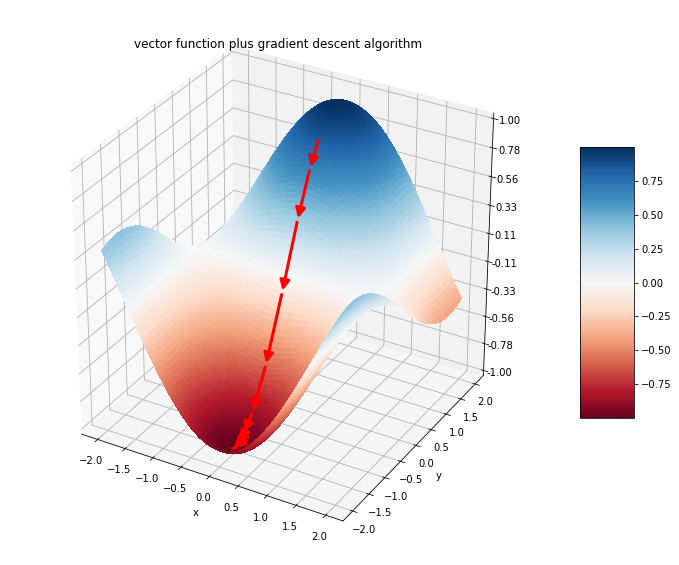

In [20]:
plot_nice_surface_and_gradients(non_symetric, -2,2, startingPoint=(0,1))